In [1]:
import os, glob, math, operator
import ROOT as ROOT
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad, TFile, TGraphAsymmErrors,TLatex,TLine,gStyle,TLegend,gROOT,TGraph
from ROOT import kBlack, kBlue, kRed
from array import array
import matplotlib.pyplot as plt, numpy as np
from matplotlib import text
from matplotlib.colors import LogNorm
import datetime

def SetCanvas():
    c = TCanvas("myCanvasName","The Canvas Title",650,600)
    c.SetBottomMargin(0.100)
    c.SetRightMargin(0.020)
    c.SetLeftMargin(0.150)
    c.SetTopMargin(0.080)
    return c

def SetCMSAxis(h, xoffset=1., yoffset=1.):
    h.GetXaxis().SetTitleSize(0.047)
    h.GetYaxis().SetTitleSize(0.047)

    print (type(h))
    if type(h) is ( (not ROOT.TGraphAsymmErrors) or (not ROOT.TGraph)):
        h.GetZaxis().SetTitleSize(0.047)

    h.GetXaxis().SetLabelSize(0.047)
    h.GetYaxis().SetLabelSize(0.047)
    if type(h) is ( (not ROOT.TGraphAsymmErrors) or (not ROOT.TGraph)):
        h.GetZaxis().SetLabelSize(0.047)

    h.GetXaxis().SetTitleOffset(xoffset)
    h.GetYaxis().SetTitleOffset(yoffset)
    return h

def SetLegend(coordinate_=[.50,.65,.90,.90],ncol=2):
    c_=coordinate_
    legend=ROOT.TLegend(c_[0], c_[1],c_[2],c_[3])
    legend.SetBorderSize(0)
    legend.SetNColumns(ncol)
    legend.SetLineColor(1)
    legend.SetLineStyle(1)
    legend.SetLineWidth(1)
    legend.SetFillColor(0)
    legend.SetFillStyle(0)
    legend.SetTextFont(42)
    legend.SetTextSize(0.035)
    return legend


def drawenergy1D(is2017, text_="Work in progress 2018", data=True):
    #pt = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt = ROOT.TPaveText(0.0997181,0.95,0.9580537,0.96,"brNDC")
    pt.SetBorderSize(0)
    pt.SetTextAlign(12)
    pt.SetFillStyle(0)
    pt.SetTextFont(52)

    cmstextSize = 0.07
    preliminarytextfize = cmstextSize * 0.7
    lumitextsize = cmstextSize *0.7
    pt.SetTextSize(cmstextSize)
    text = pt.AddText(0.03,0.57,"#font[60]{CMS}")

    #pt1 = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt1 = ROOT.TPaveText(0.0877181,0.95,0.9580537,0.96,"brNDC")
    pt1.SetBorderSize(0)
    pt1.SetTextAlign(12)
    pt1.SetFillStyle(0)
    pt1.SetTextFont(52)

    pt1.SetTextSize(preliminarytextfize)
    #text1 = pt1.AddText(0.215,0.4,text_)
    text1 = pt1.AddText(0.15,0.4,text_)

    #pt2 = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt2 = ROOT.TPaveText(0.0997181,0.95,0.9580537,0.96,"brNDC")
    pt2.SetBorderSize(0)
    pt2.SetTextAlign(12)
    pt2.SetFillStyle(0)
    pt2.SetTextFont(52)
    pt2.SetTextFont(42)
    pt2.SetTextSize(lumitextsize)

    pavetext = ''
    if is2017 and data: pavetext = str(luminosity_)+' fb^{-1}'+" (13 TeV)"
    if (not is2017) and data: pavetext = str(luminosity_)+' fb^{-1}'+"(13 TeV)"

    if is2017 and not data: pavetext = "13 TeV"
    if (not is2017) and not data: pavetext = "13 TeV"

    if data: text3 = pt2.AddText(0.68,0.5,pavetext)
    if not data: text3 = pt2.AddText(0.85,0.5,pavetext)

    return [pt,pt1,pt2]

def getLatex():
    latex =  TLatex()
    latex.SetNDC();
    latex.SetTextSize(0.04);
    latex.SetTextAlign(31);
    latex.SetTextAlign(11);
    latex.SetTextColor(1);
    return latex


def getGraph(n,x,y,lc,mc,ms):
    gr =TGraph(n,x,y)
    gr.SetFillColor(4)
    #gr.SetFillStyle(3004)
    gr.SetLineColor(4)
    gr.SetLineWidth(2)
    gr.SetMarkerStyle(ms)
    gr.SetMarkerSize(1.5)
    gr.SetLineColor(lc)
    gr.SetLineWidth(1)
    gr.SetMarkerColor(mc)
    gr.GetYaxis().SetTitle("Signal Efficiency")
    gr.GetXaxis().SetTitle("M_{a} (GeV)")
#     gr.SetTitle("") 
    return gr
    


Welcome to JupyROOT 6.22/06


In [2]:
datestr = str(datetime.date.today().strftime("%d%m%Y"))
luminosity_ = '{0:.2f}'.format(35.82)

In [3]:
gStyle.SetErrorX(0.5)
gStyle.SetFrameLineWidth(3)
gStyle.SetOptTitle(0)
gStyle.SetOptStat(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetFillColor(2)
gStyle.SetLineWidth(1)
gStyle.SetHistFillStyle(2)
gROOT.SetBatch(True)

sig_plots = {}

for y in [2017]:
    if y==2016:
        SignalPath="/Users/ptiwari/cernBox/Documents/ExoPieCapper/analysis_histo_v16_07_04_01_lep2binfix"
    elif y==2017:
        SignalPath="/Users/ptiwari/cernBox/Documents/ExoPieCapper/analysis_histo_v17_10_00_00_dijetplot_sig"
    elif y==2018:
        SignalPath="/Users/ptiwari/cernBox/Documents/ExoPieCapper/analysis_histo_v18_07_04_01_Signal"
    sig_list = [SignalPath+'/' +fl for fl in os.listdir(SignalPath) if '.root' in fl and 'bbDM_2HDMa' in fl]
    for cat in ('1b','2b'):
    #for cat in ['1b']:
        sig_eff_ma_600 = {}
        sig_eff_ma_1200 = {}
        for iFile in sig_list:
            fin = TFile(iFile,"READ")
            rootFile = iFile.split('/')[-1]
            #print ('rootFile', rootFile.split('_'))
            if y ==2016:
                ma_ = int(rootFile.split('_')[4].strip('Ma'))
                mA_ = int(rootFile.split('_')[6].strip('MA'))
#                 ma_ = int(rootFile.split('_')[9])
#                 mA_ = int(rootFile.split('_')[11].strip('.root'))
            if y==2017 or y==2018:
#                 ma_ = int(rootFile.split('_')[6].strip('Ma'))
#                 mA_ = int(rootFile.split('_')[8].strip('MA'))
                ma_ = int(rootFile.split('_')[9])
                mA_ = int(rootFile.split('_')[11].strip('.root'))
            if mA_ == 600:
                #print (mA_)
                hist = fin.Get("h_reg_SR_"+cat+"_MET")
                hist_total = fin.Get("h_total_mcweight")
                hist_eff = (hist.Integral()/hist_total.Integral())*100
                sig_eff_ma_600.update({ma_:hist_eff})
            if mA_ == 1200:
                #print (mA_)
                hist = fin.Get("h_reg_SR_"+cat+"_MET")
                hist_total = fin.Get("h_total_mcweight")
                hist_eff = (hist.Integral()/hist_total.Integral())*100
                sig_eff_ma_1200.update({ma_:hist_eff})        
        sig_plots.update({str(y)+'_'+cat+'_MA600':sig_eff_ma_600})
        sig_plots.update({str(y)+'_'+cat+'_MA1200':sig_eff_ma_1200})

(10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500) (3.9015842167894714, 4.20355048419925, 4.560450950394506, 4.603885128695841, 4.885673576627667, 4.9716498356579555, 5.018143366062553, 5.107380898736614, 4.9385099348981925, 4.964723843525558, 4.927532656099222)
<class cppyy.gbl.TGraph at 0x7f8c67c68940>
(10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 700, 750, 1000) (3.9954046348699714, 4.106156121516488, 4.440934147197919, 4.635764326343089, 4.8420891116108935, 4.907398781839152, 4.9834604582339646, 5.073923335367795, 5.01214328570045, 5.129559014296035, 5.0049223035194474, 4.715553306755178, 4.903051752327203, 4.747053305938103)
<class cppyy.gbl.TGraph at 0x7f8c67c68940>
(10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500) (1.8820530708897856, 2.2614500404409084, 2.2815589856657184, 2.504876552346807, 2.5703875189288, 2.6522935533518943, 2.693029136938502, 2.767638554900906, 2.8142585253181793, 2.849688906592062, 2.812373616363178)
<class cppyy.gbl.TGraph at 0x7f8c67c68940

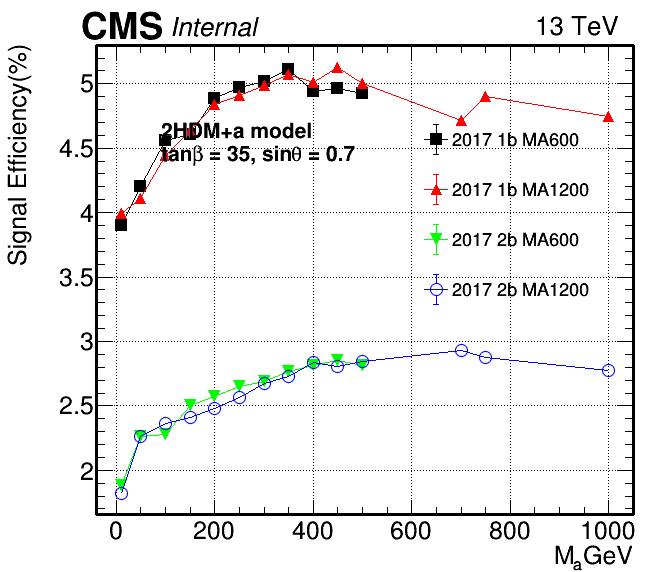

In [4]:
c1 = SetCanvas()
c1.SetTickx()
c1.SetTicky()
c1.SetGridx()
c1.SetGridy()
# c1.SetLogy(1)
c1.cd()
legend = SetLegend([.65,.45,.85,.80],ncol=1)
fst_ele = 1
all_graph = ROOT.TMultiGraph()
for key in sig_plots: 
    sig_eff_sorted = sorted(sig_plots[key].items(), key=operator.itemgetter(0))
    x12, y12 = zip(*sig_eff_sorted)
    print(x,y for x, y in (x12, y12))
    x12 = array('d',x12)
    y12 = array('d',y12)
    gr12 = getGraph(len(x12),x12,y12,fst_ele,fst_ele,20+fst_ele)
    gr12 = SetCMSAxis(gr12,1,1.6)
    all_graph.Add(gr12)
    legend.AddEntry(gr12,str(key).replace('_',' '),"PEL")
    fst_ele+=1
all_graph.Draw("ALP")
legend.Draw('p same')
all_graph.SetTitle(";M_{a}GeV;Signal Efficiency(%)");
all_graph= SetCMSAxis(all_graph,1,1.6)
pt = drawenergy1D(True,text_="    Internal",data=False)
for ipt in pt: ipt.Draw()
latex=getLatex()
latex.DrawLatex(0.25, 0.74,'#splitline{2HDM+a model}{tan#beta = 35, sin#theta = 0.7}')

c1.Update()
c1.Draw()
c1.SaveAs('signal_efficiency_'+datestr+'.pdf')
c1.SaveAs('signal_efficiency_'+datestr+'.png')